In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sb.set(font_scale = 2)
sb.set_style('whitegrid')


In [2]:
trainData = pd.read_csv('Data_Train(clean).csv')
trainData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [3]:
trainData.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage(kmpl)        float64
Engine(CC)             int64
Power(bhp)           float64
Seats                  int64
Price                float64
dtype: object

## Converting `Year` to a ordinal variable

In [4]:
trainData.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2004, 2002, 2000, 2005, 2003, 1999, 1998, 2001],
      dtype=int64)

In [5]:
trainData.Year.nunique()

22

In [6]:
years = trainData.Year.unique()
print(years)

[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2004 2002 2000 2005 2003 1999 1998 2001]


In [7]:
#creating a dictionary of mapping years to ordered integer values for creating the ordinal variable
years.sort()
print(f"Sorted years:\n{years}")
dt = {}
k = 0
for i in years:
    dt[i] = k
    k += 1
print(f"Dictionary of mappings:\n{dt}")

Sorted years:
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
Dictionary of mappings:
{1998: 0, 1999: 1, 2000: 2, 2001: 3, 2002: 4, 2003: 5, 2004: 6, 2005: 7, 2006: 8, 2007: 9, 2008: 10, 2009: 11, 2010: 12, 2011: 13, 2012: 14, 2013: 15, 2014: 16, 2015: 17, 2016: 18, 2017: 19, 2018: 20, 2019: 21}


In [8]:
# adding the ordinal 'Year' variable
yearOrd = trainData['Year'].replace(dt)
yearOrd.head(20)

0     12
1     17
2     13
3     14
4     15
5     14
6     15
7     18
8     15
9     14
10    20
11    14
12    17
13    16
14    14
15    16
16    18
17    19
18    16
19    16
Name: Year, dtype: int64

In [9]:
# removing the 'Year' variable
trainData.drop('Year', axis = 1, inplace = True)
trainData.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [10]:
trainData.columns[2]

'Kilometers_Driven'

In [11]:
# inserting the ordinal variable for the 'Year' column
trainData.insert(2, 'Year', yearOrd)

In [12]:
trainData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,17,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,13,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,14,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,15,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


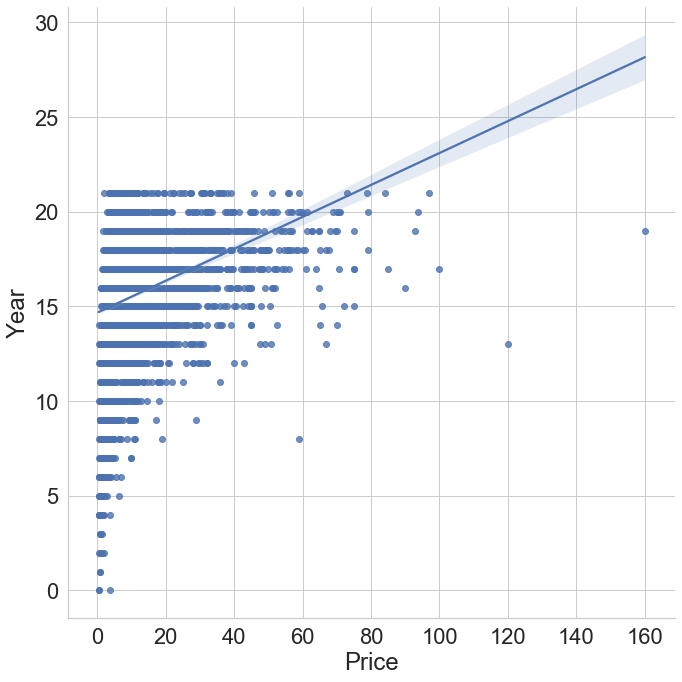

In [13]:
sb.lmplot('Price', 'Year', data = trainData, height = 10)

In [14]:
trainData[['Year', 'Price']].corr()

,Year,Price
Year,1.000000,0.299192
Price,0.299192,1.000000


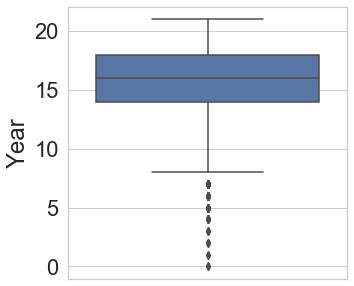

In [15]:
plt.figure(figsize = (5, 5))
sb.boxplot(y = 'Year', data = trainData)

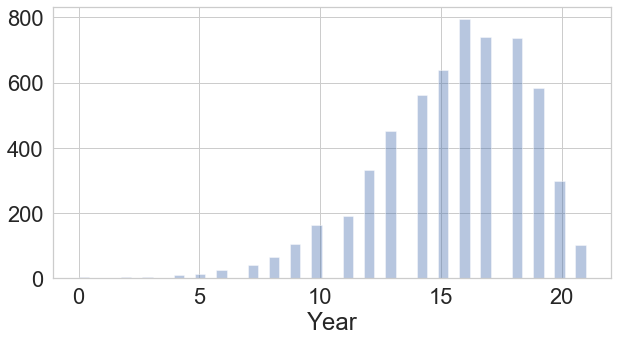

In [16]:
plt.figure(figsize = (10, 5))
sb.distplot(trainData.Year, kde = False)

## Creating a One-Hot encoded variable from the `Location` variable

In [17]:
trainData.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [18]:
trainData.Location.nunique()

11

In [19]:
trainData = pd.get_dummies(trainData, prefix_sep = '_', columns = ['Location'], drop_first = True)

In [20]:
trainData.iloc[:,11:].head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [21]:
print(trainData.columns.values)
len(trainData.columns.values)

['Name' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission' 'Owner_Type'
 'Mileage(kmpl)' 'Engine(CC)' 'Power(bhp)' 'Seats' 'Price'
 'Location_Bangalore' 'Location_Chennai' 'Location_Coimbatore'
 'Location_Delhi' 'Location_Hyderabad' 'Location_Jaipur' 'Location_Kochi'
 'Location_Kolkata' 'Location_Mumbai' 'Location_Pune']


21

In [22]:
colsLoc = trainData.columns.values
colsLocLast = [x for x in colsLoc[11:]]
colsLocLast.extend(colsLoc[:11])
print(f"The arranged columns:\n{colsLocLast}")

The arranged columns:
['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']


In [23]:
trainData = trainData[colsLocLast]
trainData.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,0,0,0,0,0,0,0,0,1,0,...,12,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,0,0,0,0,0,0,0,0,0,1,...,17,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,0,1,0,0,0,0,0,0,0,0,...,13,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,0,1,0,0,0,0,0,0,0,0,...,14,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,0,0,1,0,0,0,0,0,0,0,...,15,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


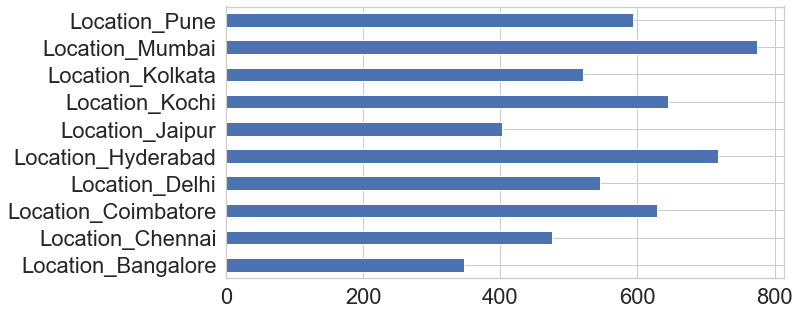

In [24]:
# plotting the number of cars bought in each city
locations = []
locNames = []
for location in trainData.columns[0:10]:
    locations.append(trainData[location].value_counts()[1]) 
    locNames.append(location)
locations = pd.Series(locations, index = locNames)
plt.figure(figsize = (10, 5))
locations.plot(kind = 'barh')

## Creating a one-hot encoded variable out of the `Name` variable

In [25]:
trainData.Name.head(60)

0                               Maruti Wagon R LXI CNG
1                     Hyundai Creta 1.6 CRDi SX Option
2                                         Honda Jazz V
3                                    Maruti Ertiga VDI
4                      Audi A4 New 2.0 TDI Multitronic
5                      Hyundai EON LPG Era Plus Option
6                               Nissan Micra Diesel XV
7                    Toyota Innova Crysta 2.8 GX AT 8S
8                  Volkswagen Vento Diesel Comfortline
9                       Tata Indica Vista Quadrajet LS
10                                    Maruti Ciaz Zeta
11                         Honda City 1.5 V AT Sunroof
12                               Maruti Swift VDI BSIV
13                    Land Rover Range Rover 2.2L Pure
14                      Land Rover Freelander 2 TD4 SE
15                         Mitsubishi Pajero Sport 4X4
16                               Honda Amaze S i-Dtech
17                               Maruti Swift DDiS VDI
18        

In [26]:
trainData.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [27]:
trainData.Name.nunique()

1811

In [28]:
brand = []
model = []
for i in trainData.Name:
    name = i.split(" ")
    if (name[0] == "Land") & (name[1] == "Rover"):
        carName = ' '.join(name[0:2])
        brand.append(carName)
        model.append(name[2:])
    else:
        brand.append(name[0])
        model.append(name[1:])
brand

['Maruti',
 'Hyundai',
 'Honda',
 'Maruti',
 'Audi',
 'Hyundai',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Maruti',
 'Honda',
 'Maruti',
 'Land Rover',
 'Land Rover',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Renault',
 'Mercedes-Benz',
 'BMW',
 'Maruti',
 'Audi',
 'Hyundai',
 'Volkswagen',
 'Honda',
 'Nissan',
 'Maruti',
 'Honda',
 'Toyota',
 'Renault',
 'Toyota',
 'Mahindra',
 'Audi',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Mercedes-Benz',
 'Volkswagen',
 'Maruti',
 'Tata',
 'Mahindra',
 'Hyundai',
 'Hyundai',
 'Toyota',
 'Hyundai',
 'Toyota',
 'Hyundai',
 'Mahindra',
 'Audi',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Volkswagen',
 'Renault',
 'Hyundai',
 'Nissan',
 'Maruti',
 'Toyota',
 'Ford',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Tata',
 'Audi',
 'Honda',
 'Mercedes-Benz',
 'Maruti',
 'Hyundai',
 'Porsche',
 'Mahindra',
 'Hyundai',
 'Nissan',
 'Honda',
 'Audi',
 'Toyota',
 'Toyota',
 'Maruti',
 'Tata',
 'Honda',
 'Ford',
 'Maruti',
 'Honda',
 'BMW',
 'Hyundai',


In [29]:
model

[['Wagon', 'R', 'LXI', 'CNG'],
 ['Creta', '1.6', 'CRDi', 'SX', 'Option'],
 ['Jazz', 'V'],
 ['Ertiga', 'VDI'],
 ['A4', 'New', '2.0', 'TDI', 'Multitronic'],
 ['EON', 'LPG', 'Era', 'Plus', 'Option'],
 ['Micra', 'Diesel', 'XV'],
 ['Innova', 'Crysta', '2.8', 'GX', 'AT', '8S'],
 ['Vento', 'Diesel', 'Comfortline'],
 ['Indica', 'Vista', 'Quadrajet', 'LS'],
 ['Ciaz', 'Zeta'],
 ['City', '1.5', 'V', 'AT', 'Sunroof'],
 ['Swift', 'VDI', 'BSIV'],
 ['Range', 'Rover', '2.2L', 'Pure'],
 ['Freelander', '2', 'TD4', 'SE'],
 ['Pajero', 'Sport', '4X4'],
 ['Amaze', 'S', 'i-Dtech'],
 ['Swift', 'DDiS', 'VDI'],
 ['Duster', '85PS', 'Diesel', 'RxL', 'Plus'],
 ['New', 'C-Class', 'C', '220', 'CDI', 'BE', 'Avantgare'],
 ['3', 'Series', '320d'],
 ['S', 'Cross', 'DDiS', '200', 'Alpha'],
 ['A6', '2011-2015', '35', 'TFSI', 'Technology'],
 ['i20', '1.2', 'Magna'],
 ['Vento', 'Petrol', 'Highline', 'AT'],
 ['City', 'Corporate', 'Edition'],
 ['Micra', 'Diesel', 'XV'],
 ['Alto', 'K10', '2010-2014', 'VXI'],
 ['WRV', 'i-VTEC',

In [30]:
trainData.insert(10, 'Brand', brand)

In [31]:
trainData.iloc[:,10:]

,Brand,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti,Maruti Wagon R LXI CNG,12,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,17,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda,Honda Jazz V,13,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti,Maruti Ertiga VDI,14,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi,Audi A4 New 2.0 TDI Multitronic,15,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5866,Maruti,Maruti Swift VDI,16,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5867,Hyundai,Hyundai Xcent 1.1 CRDi S,17,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5868,Mahindra,Mahindra Xylo D4 BSIV,14,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5869,Maruti,Maruti Wagon R VXI,15,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [32]:
trainData.columns

Index(['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Brand', 'Name', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Seats', 'Price'],
      dtype='object')

In [33]:
trainData.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

There are two car brand names which refer to the same brand, *ISUZU* and *Isuzu*. We will change that into a single car brand *ISUZU*

In [35]:
for i in range(trainData.shape[0]):
    if trainData.Brand[i] == "Isuzu":
        trainData.loc[i,'Brand'] = "ISUZU"
trainData.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [36]:
trainData.Brand.nunique()

29

In [39]:
trainData.Brand.value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               261
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land Rover         57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               3
Lamborghini         1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

Lets convert the `Brand` variable into a one-hot encoded variable

In [40]:
trainData = pd.get_dummies(data = trainData, prefix_sep = '_', columns = ['Brand'], drop_first = True)

In [41]:
trainData.shape

(5871, 49)

In [42]:
trainData.iloc[:,21:]

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5867,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
colsLoc = trainData.columns.values
colsLocLast = [x for x in colsLoc[21:]]
colsLocLast.extend(colsLoc[:21])
print(f"The arranged columns:\n{colsLocLast}")

The arranged columns:
['Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']


In [44]:
trainData.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
trainData = trainData[colsLocLast]
trainData.iloc[:,0:38].head()

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
trainData.head()

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,0,0,0,0,0,0,0,0,0,0,...,12,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,0,0,0,0,0,0,0,0,0,1,...,17,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,0,0,0,0,0,0,0,0,1,0,...,13,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,0,0,0,0,0,0,0,0,0,0,...,14,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,1,0,0,0,0,0,0,0,0,0,...,15,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


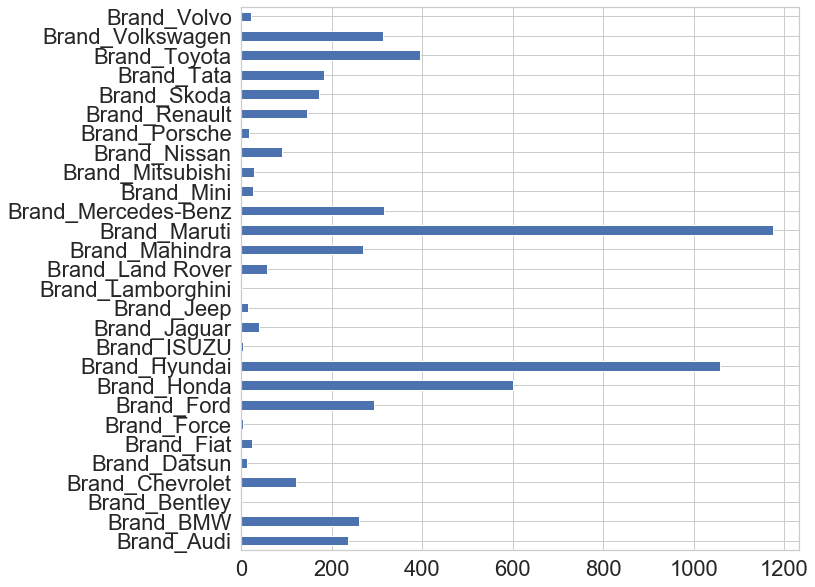

In [47]:
# plotting the number of cars bought in each city
brandNum = []
brandNames = []
for brd in trainData.columns[0:28]:
    brandNum.append(trainData[brd].value_counts()[1]) 
    brandNames.append(brd)
brandNum = pd.Series(brandNum, index = brandNames)
plt.figure(figsize = (10, 10))
brandNum.plot(kind = 'barh')

In [48]:
# removing the 'Name' column
trainData.drop('Name', axis = 1, inplace = True)
trainData.columns

Index(['Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)',
       'Power(bhp)', 'Seats', 'Price'],
      dtype='object')

In [49]:
trainData.shape

(5871, 48)

## Creating a one-hot encoded variable from the `Fuel_Type` variable

In [50]:
trainData.Fuel_Type.head()

0       CNG
1    Diesel
2    Petrol
3    Diesel
4    Diesel
Name: Fuel_Type, dtype: object

In [51]:
trainData.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [52]:
trainData.Fuel_Type.value_counts()

Diesel    3151
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [53]:
# creating a one-hot encoded variable from the 'Fuel_Type' variable
pd.get_dummies(data = trainData, columns = ['Fuel_Type']).iloc[:,47:].head(20)

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [54]:
trainData = pd.get_dummies(data = trainData, columns = ['Fuel_Type'], drop_first = True)

In [55]:
trainData.shape

(5871, 50)

In [56]:
trainData.columns

Index(['Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Kilometers_Driven', 'Transmission',
       'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats',
       'Price', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

In [57]:
colsLoc = trainData.columns.values
colsLocLast = [x for x in colsLoc[47:]]
colsLocLast.extend(colsLoc[:47])
print(f"The arranged columns:\n{colsLocLast}")

The arranged columns:
['Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']


In [58]:
# arranging the columns in the data set
trainData = trainData[colsLocLast]
trainData.columns

Index(['Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi',
       'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun',
       'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Kilometers_Driven', 'Transmission',
       'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats',
       'Price'],
      dtype='object')

In [59]:
trainData.iloc[:,0:3].head(20)

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,1,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [60]:
trainData.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,...,Location_Pune,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,0,0,0,0,0,0,0,0,0,0,...,0,12,72000,Manual,First,26.60,998,58.16,5,1.75
1,1,0,0,0,0,0,0,0,0,0,...,1,17,41000,Manual,First,19.67,1582,126.20,5,12.50
2,0,0,1,0,0,0,0,0,0,0,...,0,13,46000,Manual,First,18.20,1199,88.70,5,4.50
3,1,0,0,0,0,0,0,0,0,0,...,0,14,87000,Manual,First,20.77,1248,88.76,7,6.00
4,1,0,0,1,0,0,0,0,0,0,...,0,15,40670,Automatic,Second,15.20,1968,140.80,5,17.74


In [61]:
fuelNum = []
fuelNames = []
for fuel in trainData.columns[0:3]:
    fuelNum.append(trainData[fuel].value_counts()[1]) 
    fuelNames.append(fuel)
fuelNum = pd.Series(fuelNum, index = fuelNames)
fuelNum

Fuel_Type_Diesel    3151
Fuel_Type_LPG         10
Fuel_Type_Petrol    2655
dtype: int64

## Creating a one-hot encoded variable from the `Seats` variable

In [62]:
trainData.Seats.head(20)

0     5
1     5
2     5
3     7
4     5
5     5
6     5
7     8
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    7
16    5
17    5
18    5
19    5
Name: Seats, dtype: int64

In [63]:
trainData.Seats.unique()

array([ 5,  7,  8,  4,  6,  2, 10,  9], dtype=int64)

In [64]:
trainData.Seats.nunique()

8

In [65]:
pd.get_dummies(data = trainData, columns = ['Seats'], drop_first = True)

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,...,Engine(CC),Power(bhp),Price,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8,Seats_9,Seats_10
0,0,0,0,0,0,0,0,0,0,0,...,998,58.16,1.75,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1582,126.20,12.50,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1199,88.70,4.50,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1248,88.76,6.00,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,1968,140.80,17.74,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,1,0,0,0,0,0,0,0,0,0,...,1248,74.00,4.75,0,1,0,0,0,0,0
5867,1,0,0,0,0,0,0,0,0,0,...,1120,71.00,4.00,0,1,0,0,0,0,0
5868,1,0,0,0,0,0,0,0,0,0,...,2498,112.00,2.90,0,0,0,0,1,0,0
5869,0,0,1,0,0,0,0,0,0,0,...,998,67.10,2.65,0,1,0,0,0,0,0


In [66]:
trainData = pd.get_dummies(data = trainData, columns = ['Seats'], drop_first = True)

In [67]:
trainData.iloc[:,49:].head()

,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8,Seats_9,Seats_10
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0


In [68]:
colsLoc = trainData.columns.values
colsLocLast = [x for x in colsLoc[49:]]
colsLocLast.extend(colsLoc[:49])
print(f"The arranged columns:\n{colsLocLast}")

The arranged columns:
['Seats_4', 'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Price']


In [69]:
trainData = trainData[colsLocLast]
trainData.columns.values

array(['Seats_4', 'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9',
       'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini',
       'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Kilometers_Driven', 'Transmission',
       'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)

In [70]:
trainData.head()

,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8,Seats_9,Seats_10,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,...,Location_Mumbai,Location_Pune,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Price
0,0,1,0,0,0,0,0,0,0,0,...,1,0,12,72000,Manual,First,26.60,998,58.16,1.75
1,0,1,0,0,0,0,0,1,0,0,...,0,1,17,41000,Manual,First,19.67,1582,126.20,12.50
2,0,1,0,0,0,0,0,0,0,1,...,0,0,13,46000,Manual,First,18.20,1199,88.70,4.50
3,0,0,0,1,0,0,0,1,0,0,...,0,0,14,87000,Manual,First,20.77,1248,88.76,6.00
4,0,1,0,0,0,0,0,1,0,0,...,0,0,15,40670,Automatic,Second,15.20,1968,140.80,17.74


In [71]:
seatNum = []
seatNames = []
for seat in trainData.columns[0:7]:
    seatNum.append(trainData[seat].value_counts()[1]) 
    seatNames.append(seat)
seatNum = pd.Series(seatNum, index = seatNames)
seatNum

Seats_4       99
Seats_5     4918
Seats_6       29
Seats_7      672
Seats_8      133
Seats_9        3
Seats_10       4
dtype: int64

## Creating one-hot encoded variables from the `Transmission` variable

In [72]:
trainData.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [73]:
trainData = pd.get_dummies(data = trainData, columns = ['Transmission'], drop_first = True)

In [74]:
trainData.columns

Index(['Seats_4', 'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9',
       'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Kilometers_Driven', 'Owner_Type',
       'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Price',
       'Tra

In [75]:
trainData.Transmission_Manual.head(10)

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Transmission_Manual, dtype: uint8

In [76]:
colsLoc = trainData.columns.values
colsLocLast = [colsLoc[-1]]
colsLocLast.extend(colsLoc[:-1])
print(f"The arranged columns:\n{colsLocLast}")

The arranged columns:
['Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Price']


In [77]:
trainData = trainData[colsLocLast]
trainData.columns

Index(['Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven',
       'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)

In [78]:
trainData.head()

,Transmission_Manual,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8,Seats_9,Seats_10,Fuel_Type_Diesel,Fuel_Type_LPG,...,Location_Kolkata,Location_Mumbai,Location_Pune,Year,Kilometers_Driven,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Price
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,12,72000,First,26.60,998,58.16,1.75
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,17,41000,First,19.67,1582,126.20,12.50
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,13,46000,First,18.20,1199,88.70,4.50
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,14,87000,First,20.77,1248,88.76,6.00
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,15,40670,Second,15.20,1968,140.80,17.74


## Creating Label encoded (ordinal) variables from the `Owner_Type` variable

In [79]:
 trainData.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [80]:
# changing the 'Fourth & Above' values to 'Fourth-and-Above'
owners = trainData.loc[:,'Owner_Type'].values
for i in range(len(owners)):
    if owners[i] == 'Fourth & Above':
        owners[i] = 'Fourth-and-Above'
trainData.Owner_Type.unique()

array(['First', 'Second', 'Fourth-and-Above', 'Third'], dtype=object)

In [81]:
# creating a mapping from the owner level categories to an ordered numeric level
ownerLevel = ['First', 'Second', 'Third', 'Fourth-and-Above']
print(f"Sorted Owner Levels:\n{ownerLevel}")
dt = {}
k = 0
for i in ownerLevel:
    dt[i] = k
    k += 1
print(f"Dictionary of mappings:\n{dt}")

Sorted Owner Levels:
['First', 'Second', 'Third', 'Fourth-and-Above']
Dictionary of mappings:
{'First': 0, 'Second': 1, 'Third': 2, 'Fourth-and-Above': 3}


In [82]:
# creating the ordinal variable for 'Owner_Type'
ownerType = trainData.Owner_Type.replace(dt)
ownerType.value_counts()

0    4838
1     925
2     101
3       7
Name: Owner_Type, dtype: int64

In [83]:
# the original 'Owner_Type' variable
trainData.Owner_Type.value_counts()

First               4838
Second               925
Third                101
Fourth-and-Above       7
Name: Owner_Type, dtype: int64

In [84]:
trainData.drop('Owner_Type', axis = 1, inplace = True)

In [85]:
trainData.columns

Index(['Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven',
       'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Price'],
 

In [86]:
trainData.columns[-6]

'Year'

In [87]:
trainData.insert(50, 'Owner_Type', ownerType, True)

In [88]:
trainData.columns

Index(['Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Owner_Type',
       'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)

In [89]:
trainData.Owner_Type.value_counts()

0    4838
1     925
2     101
3       7
Name: Owner_Type, dtype: int64

In [90]:
ownerTypeDF = pd.get_dummies(trainData.Owner_Type, drop_first = True)

In [91]:
ownerTypeDF.head(20)

,1,2,3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,1,0,0


### inserting the three one-hot encoded variables into the train data set**

In [92]:
trainData.insert(0, 'Owner_Second', ownerTypeDF.iloc[:,0], True)
trainData.columns

Index(['Owner_Second', 'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6',
       'Seats_7', 'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini',
       'Brand_Land Rover', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Year',
       'Owner_Type', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(C

In [93]:
trainData.insert(1, 'Owner_Third', ownerTypeDF.iloc[:,1], True)
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Transmission_Manual', 'Seats_4',
       'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8', 'Seats_9', 'Seats_10',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Brand_Audi',
       'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun',
       'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land Rover', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year', 'Owner_Type', 'Kilometers_Driven',
       'Mil

In [94]:
trainData.insert(2, 'Owner_Fourth-and-Above', ownerTypeDF.iloc[:,2], True)
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Owner_Type',
      

In [95]:
trainData.iloc[:,0:3].head(20)

,Owner_Second,Owner_Third,Owner_Fourth-and-Above
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,1,0,0


In [96]:
ownerNum = []
ownerNames = []
for owner in trainData.columns[0:3]:
    ownerNum.append(trainData[owner].value_counts()[1]) 
    ownerNames.append(owner)
ownerNum = pd.Series(ownerNum, index = ownerNames)
ownerNum

Owner_Second              925
Owner_Third               101
Owner_Fourth-and-Above      7
dtype: int64

In [97]:
trainData.drop('Owner_Type', axis = 1, inplace = True)

In [98]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Kilometers_Driven',

In [99]:
# the number of values for the 'First' owner type
ownerTypeDF[(ownerTypeDF[1] == 0) & (ownerTypeDF[2] == 0) & (ownerTypeDF[3] == 0)].shape[0]

4838

In [100]:
# the shape of the training data set so far
trainData.shape

(5871, 58)

In [101]:
trainData.to_csv('Training_Data.csv', index = False)

---

## `Kilometers_Driven` and `Mileage(kmpl)`

We should remove the `Kilometers_Driven` and the `Mileage(kmpl)` variables, since they don’t affect the predicted price of a car in a practical scenario. The kilometers driven is an arbitrary variable, and there is no general relationship between the value of a car and the kilometers that it has been driven for. As for the mileage, that also is an arbitrary variable, and the kmpl or km/kg mileage rating of a car is a value that is estimated by the car manufacturer.

In [102]:
# removing the 'Kilometers_Driven' variable
trainData.drop('Kilometers_Driven', axis = 1, inplace = True)

In [103]:
# removinf the 'Mileage(kmpl)' variable
trainData.drop('Mileage(kmpl)', axis = 1, inplace = True)

In [104]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Engine(CC)', 'Power

## Scaling the `Engine(CC)` and the `Power(bhp)` columns

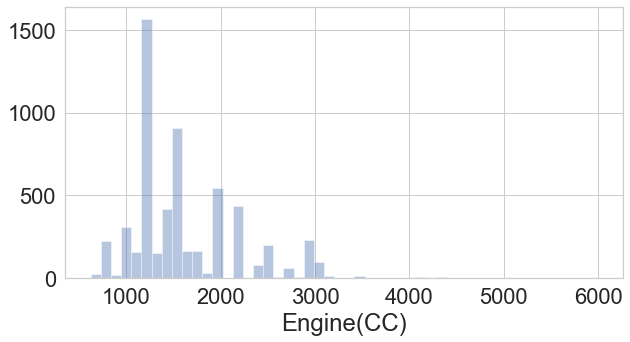

In [105]:
# distribution of the 'Engine(CC)' variable
plt.figure(figsize = (10, 5))
sb.distplot(trainData['Engine(CC)'], kde = False)

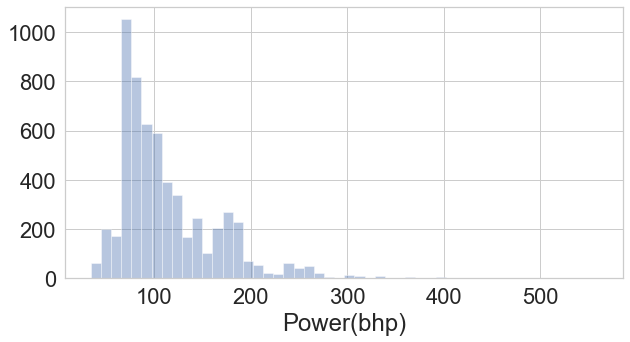

In [106]:
# distribution of the 'Power(bhp)' variable
plt.figure(figsize = (10, 5))
sb.distplot(trainData['Power(bhp)'], kde = False)

Since, neither of them have a normal distribution, both have outliers, neither the min-max scaler nor the standard scaler will work. We have to use the Robust scaler to scale these two variables.

In [107]:
from sklearn import preprocessing

In [108]:
robustScaler = preprocessing.RobustScaler()
engineRobustScaled = robustScaler.fit_transform(trainData.loc[:,['Engine(CC)', 'Power(bhp)']])
engineRobustScaled = pd.DataFrame(engineRobustScaled, columns = ['Engine', 'Power'])

In [109]:
engineRobustScaled.describe()

,Engine,Power
count,5871.000000,5871.000000
mean,0.164581,0.246470
std,0.758422,0.853461
min,-1.098361,-1.006339
25%,-0.374527,-0.359746
50%,0.000000,0.000000
75%,0.625473,0.640254
max,5.678436,7.326466


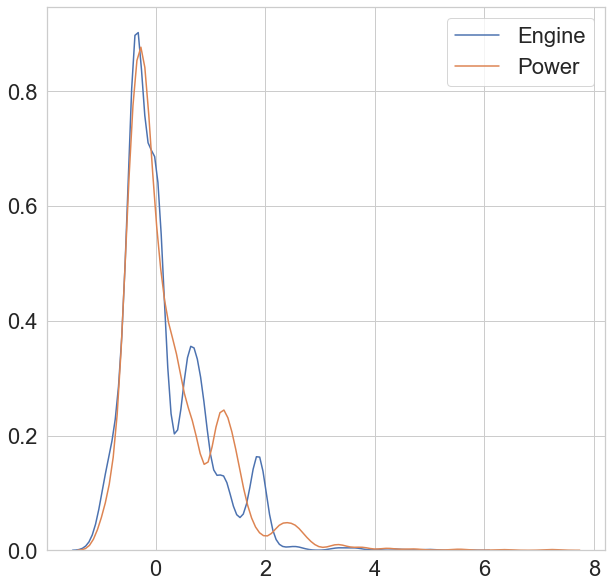

In [110]:
# scaled data
plt.figure(figsize = (10, 10))
sb.kdeplot(engineRobustScaled['Engine'])
sb.kdeplot(engineRobustScaled['Power'])

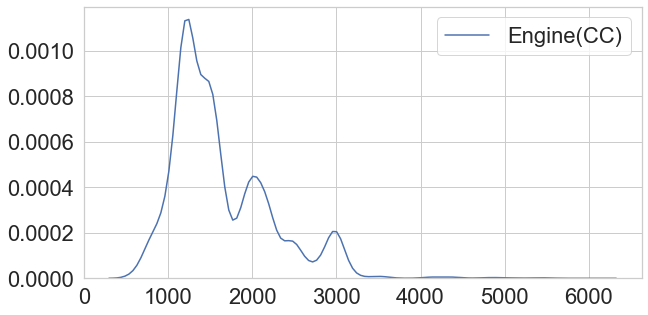

In [111]:
# unscaled data
plt.figure(figsize = (10, 5))
sb.kdeplot(trainData['Engine(CC)'])

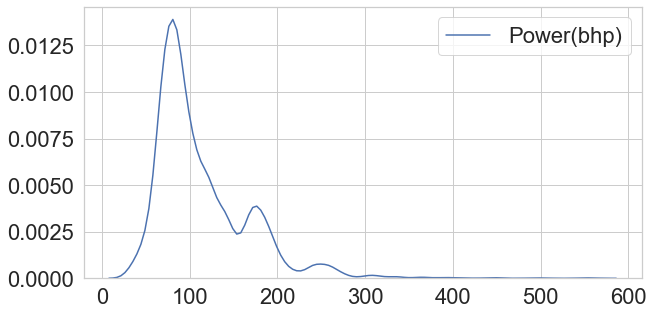

In [112]:
# unscaled data
plt.figure(figsize = (10, 5))
sb.kdeplot(trainData['Power(bhp)'])

Now, both of the variables are on the same scale, and their data-distributions are the same. Now, we have to add these values to the data set and remove the unscaled values.

In [113]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Engine(CC)', 'Power

In [114]:
trainData.insert(54, 'Engine', engineRobustScaled['Engine'])

In [115]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Engine(CC)', 'Engin

In [116]:
trainData.insert(54, 'Power', engineRobustScaled['Power'])

In [117]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Engine(CC)', 'Power

In [118]:
# removing the unscaled data
trainData.drop('Engine(CC)', axis = 1, inplace = True)
trainData.drop('Power(bhp)', axis = 1, inplace = True)

In [119]:
trainData.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Power', 'Engine', '

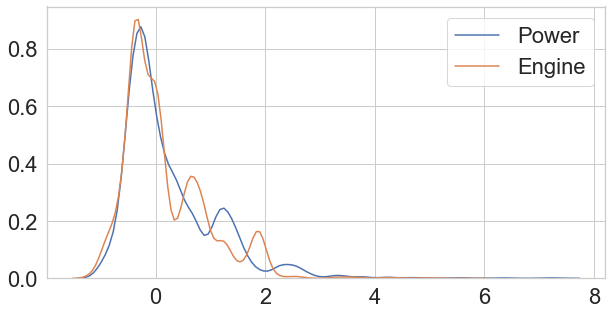

In [120]:
plt.figure(figsize = (10, 5))
sb.kdeplot(trainData.Power)
sb.kdeplot(trainData.Engine)

In [121]:
# final dataset shape befor train-test splitting
trainData.shape

(5871, 56)

In [122]:
# writing this dataset to a csv file
trainData.to_csv('Training_Model_Data.csv', index = False)

## Splitting the data into training and testing sets

In [123]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [124]:
# splitting the training set into independent and dependent variable
X = trainData.iloc[:,0:55]
Y = pd.DataFrame(trainData.iloc[:,55])

In [125]:
print(f"Independent variables:\n{X.columns}")
print(f"Dependent variable:\n{Y.columns}")

Independent variables:
Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year

In [126]:
# creating training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [127]:
X_train.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Power', 'Engine'],


In [128]:
Y_train.columns

Index(['Price'], dtype='object')

In [129]:
X_train.shape, Y_train.shape

((4109, 55), (4109, 1))

In [130]:
X_test.columns

Index(['Owner_Second', 'Owner_Third', 'Owner_Fourth-and-Above',
       'Transmission_Manual', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7',
       'Seats_8', 'Seats_9', 'Seats_10', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year', 'Power', 'Engine'],


In [131]:
Y_test.columns

Index(['Price'], dtype='object')

In [132]:
X_test.shape, Y_test.shape

((1762, 55), (1762, 1))

## Training the Linear Regression model, and cross-validation

In [133]:
# linear model training
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

Text(0, 0.5, 'Predictions')

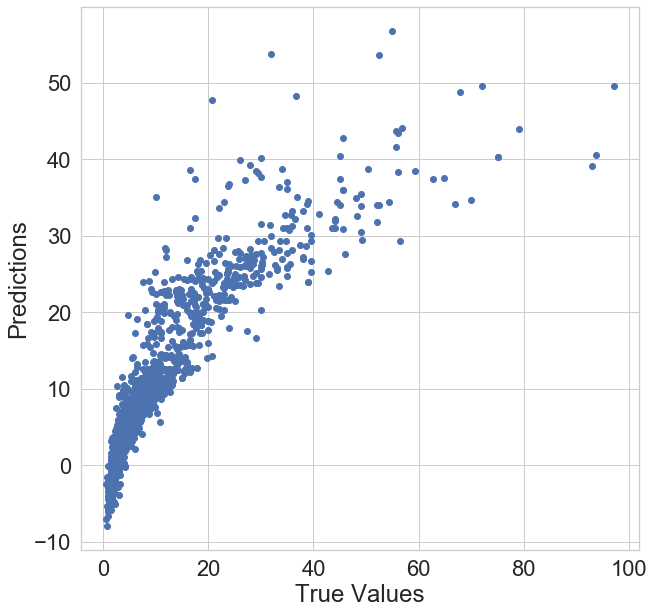

In [134]:
# plotting the predicted values against the actual values of the dependent variable
predictions = lm.predict(X_test)
plt.figure(figsize = (10, 10))
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [135]:
# importing necessary packages
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [136]:
# r^2 score
metrics.r2_score(Y_test, predictions)

0.779775569159032

In [137]:
# adjusted R^2 score
r2 = metrics.r2_score(Y_test, predictions)
r2adjusted = 1 - (((1 - r2) * (X_test.shape[0] - 1)) / (X_test.shape[0] - X_test.shape[1] - 1))
r2adjusted

0.7726757193956948

Both the r-squared and adjusted r-squared values show that the model explains a good amount of the variance in the data.

In [138]:
import math
import numpy as np

In [139]:
# root-mean-squared-error
mse = metrics.mean_squared_error(Y_test, predictions)
rmse = math.sqrt(mse)
rmse

5.17564264835917

The low value of rmse indicates that this model has a good prediction power (lower the rmse score, higher the prediction power)

In [141]:
# we will be performing a 30-fold cross validation
cv_scores = cross_val_score(model, X, Y, cv = 30)

# r2 scores for each iteration of cross validation
cv_scores 

array([ 7.34785957e-01,  8.06142546e-01,  8.01797865e-01,  7.97178086e-01,
        7.91405628e-01,  7.65001065e-01, -1.02231654e+22,  7.71869312e-01,
        8.04566268e-01,  6.61548396e-01,  8.02967580e-01,  7.91073419e-01,
        7.89590647e-01,  7.79145692e-01,  8.36124531e-01,  6.53862040e-01,
        8.11863767e-01,  8.51715645e-01,  7.85833309e-01,  7.13596936e-01,
        6.37200903e-01,  7.86209712e-01,  7.67271521e-01,  7.06065857e-01,
        8.30534138e-01,  8.11020636e-01,  8.20808635e-01,  7.89431684e-01,
        8.07658935e-01,  8.13373209e-01])

In [144]:
print("Mean of r2 scores:", np.mean(cv_scores))
print("Standard Deviation of r2 scores:", np.std(cv_scores))
print("Maximim of r2 scores:", np.max(cv_scores))
print("Minimum of r2 scores:", np.min(cv_scores))
print("Median of r2 scores:", np.median(cv_scores))

Mean of r2 scores: -3.407721801469782e+20
Standard Deviation of r2 scores: 1.835114351778006e+21
Maximim of r2 scores: 0.8517156453758572
Minimum of r2 scores: -1.0223165404409347e+22
Median of r2 scores: 0.7903320329796902


Most of the r2 scores are high, i.e., closer to 1, which means that the model explains most of the variance in the data

In [145]:
# rmse values
cv_scores_mse = cross_val_score(model, X, Y, cv = 30, scoring = 'neg_mean_squared_error')
cv_scores_rmse = np.sqrt(np.abs(cv_scores_mse))

# for each iteration of cross validation
cv_scores_rmse

array([5.05132808e+00, 6.01982015e+00, 5.40905250e+00, 5.41136029e+00,
       4.50130831e+00, 5.30337837e+00, 1.12488932e+12, 5.84432632e+00,
       4.31193970e+00, 7.88084170e+00, 5.06952789e+00, 4.49334468e+00,
       5.98743035e+00, 5.07708498e+00, 4.21689929e+00, 5.95330807e+00,
       3.83915728e+00, 3.73703076e+00, 4.02245277e+00, 4.18209957e+00,
       9.05236312e+00, 5.03688366e+00, 5.29974228e+00, 6.05220650e+00,
       4.81713476e+00, 4.42348175e+00, 4.41828905e+00, 6.07082309e+00,
       5.20237155e+00, 4.79348226e+00])

In [146]:
print("Mean of rmse values:", np.mean(cv_scores_rmse))
print("Standard Deviation of rmse values:", np.std(cv_scores_rmse))
print("Maximim of rmse values:", np.max(cv_scores_rmse))
print("Minimum of rmse values:", np.min(cv_scores_rmse))
print("Median of rmse values:", np.median(cv_scores_rmse))

Mean of rmse values: 37496310830.94918
Standard Deviation of rmse values: 201923813456.07498
Maximim of rmse values: 1124889324776.9968
Minimum of rmse values: 3.737030755400465
Median of rmse values: 5.073306433021662


Most of the rmse values are low (between 3 and 10 lakh INR) (except for the one outlier value), which means that the model has good prediction power.

The higher mean, std and maxima of the rmse values is due to one very high rmse value present in the array (1.12 * 10 ^ 12)